# 抗力係数の計算

In [11]:
import re
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os, shutil
from pathlib import Path

In [12]:
forceCoeffPath = "forceCoeffs1/0"
resultDir = Path("../postProcessing")/forceCoeffPath  # 計算フォルダ
forceCoeffData = resultDir /os.listdir(resultDir)[0]
resultDir , forceCoeffData

(PosixPath('../postProcessing/forceCoeffs1/0'),
 PosixPath('../postProcessing/forceCoeffs1/0/coefficient.dat'))

In [13]:
# OpenFOAMのデータをデータフレームで取得
df_cae = pd.read_table(forceCoeffData, index_col=False, skiprows=12)#, names=[name.replace(" ","") for name in df_cae.columns])
df_cae.columns = [name.replace(" ","") for name in df_cae.columns]
print(df_cae.columns)
df_cae.tail()

Index(['#Time', 'Cd', 'Cs', 'Cl', 'CmRoll', 'CmPitch', 'CmYaw', 'Cd(f)',
       'Cd(r)', 'Cs(f)', 'Cs(r)', 'Cl(f)', 'Cl(r)'],
      dtype='object')


,#Time,Cd,Cs,Cl,CmRoll,CmPitch,CmYaw,Cd(f),Cd(r),Cs(f),Cs(r),Cl(f),Cl(r)
608,609,0.376653,1.278965,0.404920,-0.430893,0.409560,-1.966324,-0.242566,0.619219,-1.326841,2.605806,0.612020,-0.207100
609,610,0.376021,1.277773,0.404908,-0.430665,0.408833,-1.965524,-0.242655,0.618675,-1.326638,2.604410,0.611287,-0.206379
610,611,0.375833,1.277694,0.404915,-0.430390,0.408347,-1.964957,-0.242473,0.618306,-1.326110,2.603804,0.610804,-0.205889
611,612,0.375526,1.277592,0.406537,-0.429999,0.409100,-1.965260,-0.242236,0.617762,-1.326464,2.604056,0.612368,-0.205831
612,613,0.374736,1.276166,0.405665,-0.429625,0.408227,-1.963300,-0.242257,0.616993,-1.325217,2.601383,0.611059,-0.205394


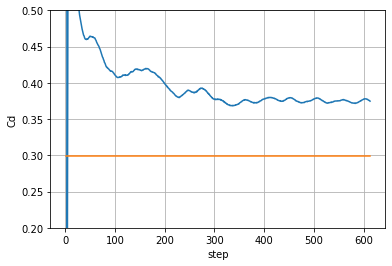

In [14]:
Cd_target = np.full(len(df_cae["#Time"]),0.299)
plt.xlabel("step")
plt.ylabel("Cd")
plt.ylim(0.2,0.5)
plt.grid()
plt.plot(df_cae["#Time"],df_cae["Cd"])
plt.plot(df_cae["#Time"], Cd_target)